In [20]:

import csv

def hr_data(filename):
    lines = []
    data = open(filename, "r") #open the file
    all_records = csv.reader(data, delimiter=",") #read the file
    
    #Removing header line
    #next(data, None)
    num_cols = len(next(all_records))
    print("num_cols: " + str(num_cols))
    #removing empty lines and empty spaces
    for i in data:
        i = i.rstrip()   
        if i != '':
            points = i.split(",")     
            
            #Delete LAST TWO elements to account for trailing
            #lines.append(points[:len(points)-2])
            lines.append(points)
    
    
    
    for row in all_records:  #loop over rows in the list all_records
        lines.append(row)
        
    return lines

def row2Col(arr):
    #Number of elements in a row (i.e number of exercises)
    count = len(arr[0])
    print("count is: " + str(count))
    
    #colArr will hold the new list of columns
    colArr = []
    
    #Initialize the column array to a list of 'count' empty lists
    for i in range(count):
        empty = []
        colArr.append(empty)
    
    #We iterate through each exercise and then add the element to the corresponding column
    for i in range(count):
        for row in arr:
            #Only add non empty element
            if (row[i]!=''):
                colArr[i].append(row[i])
    
    return colArr


thedict = {"Jay_data.csv": (189,200), "Jeremy_data.csv": (165,180), "Mila_data.csv": (167,180), "Rachel_data.csv": (178,188), "Nolan_data.csv": (172,187), "Nako_data.csv": (163,180), "Jewell_data.csv": (156,173), "Dillon_data.csv": (158,175)}

user_choice = input("Choose subject data: Jay_data.csv, Jeremy_data.csv, Mila_data.csv, Rachel_data.csv, Nolan_data.csv, Nako_data.csv,Jewell_data.csv, Dillon_data.csv")
selectfile = hr_data(user_choice)

colPoints = row2Col(selectfile)

print(colPoints)





Choose subject data: Jay_data.csv, Jeremy_data.csv, Mila_data.csv, Rachel_data.csv, Nolan_data.csv, Nako_data.csv,Jewell_data.csv, Dillon_data.csvJewell_data.csv
num_cols: 18
count is: 18
[['123', '124', '124', '123', '122', '124', '127', '127', '128', '126', '129', '131', '133', '133', '135', '136', '138', '139', '138', '137', '136', '136', '133', '132', '133', '135', '133', '131', '131', '133', '132', '134', '140', '145', '149', '150', '152', '152', '151', '152', '154', '159', '162', '162', '162', '163', '164', '166', '167', '169', '170', '169', '169', '171', '169', '169', '171', '171', '171', '169', '172', '172', '171', '171', '172', '171', '172', '171', '174', '172', '174', '173', '174', '173', '173', '173', '172', '173', '173', '174', '174', '174', '175', '175', '176', '175', '175', '175', '176', '175', '174', '174', '175', '175', '176', '176', '176', '177', '177', '178', '178', '177', '176', '177', '176', '176', '177', '177', '176', '177', '178', '179', '178', '179', '179', '178'

In [21]:


def calculate(range_low, range_high):
    for workout in colPoints:
        count = 0
        numPoints = len(workout)

        print("num points: ", numPoints)
    for current_val in workout:
        if (int(current_val) > range_low and int(current_val) < range_high):
            count = count + 1


    percent = (count/numPoints)*100
    return percent

num points:  205
num points:  1948
num points:  1067
num points:  534
num points:  3466
num points:  335
num points:  3426
num points:  3520
num points:  3520
num points:  677
num points:  2066
num points:  2403
num points:  620
num points:  1252
num points:  1799
num points:  3557
num points:  1011
num points:  3064


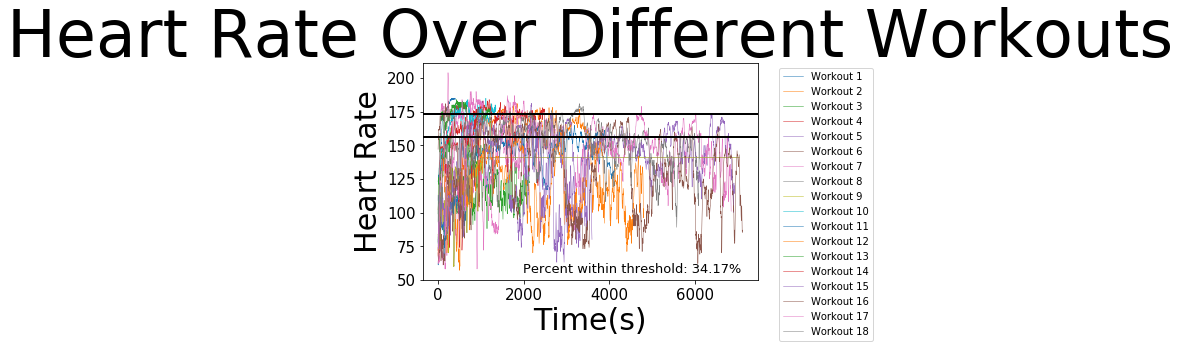

In [22]:
#Creating time array

tinterval=2
tlen=[]
times=[]

for i in range(len(colPoints)):
    
    #finding the length of a workout column
    tlength=len(colPoints[i])
    #adding the length to an array 
    tlen.append(tlength)
    
    #create an empty array (times) of arrays, the same amount as colPoints.
    
    times.append([])
    
#Initiate variable as 0. Want counter to start at 0. (n is our counter)
n=0

#tlen = [L1, L2, L3, ..., L8]
#Where each L value is the number of values in some workout column.
for length in tlen:
    for i in range(length):
        t=tinterval*i
        times[n].append(t)

    n = n + 1 


from pylab import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy
from scipy import signal

fig = plt.figure()
for i in range(len(colPoints)):
    #times is array of arrays.  times[i] gives you an array consisting of independent (x axis) points for some
    #workout column i
    
    #colPoints is an array of arrays. colPoints[i] gives you an array containing the dependent (y axis)
    #data for i=0 (first workout), i=2 (second workout), etc.
    #if i=1, i'm looking at the second workout.
    plt.plot(times[i],colPoints[i],label="Workout "+str(i+1),linewidth=0.5)

plt.xlabel('Time(s)',fontsize=30)
plt.ylabel('Heart Rate',fontsize=30)
plt.title('Heart Rate Over Different Workouts',fontsize=65)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)   #legend placement


#adding in the percent within threshold calculation
value = thedict[user_choice]
range_low = value[0]
range_high = value[1]


perc_val = round(calculate(range_low, range_high), 2)
perc_str = "Percent within threshold: " + str(perc_val) + "%"


ax = fig.add_subplot(111)
ax.text(0.95, 0.02, perc_str, verticalalignment = 'bottom', horizontalalignment = 'right',
       transform=ax.transAxes, color='black', fontsize=13)

plt.axhline(y= range_low, c="black",linewidth=2)
plt.axhline(y= range_high, c="black",linewidth=2)


plt.show()